In [11]:
import pandas as pd

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [14]:
import statsmodels.api as sm

In [15]:
import statsmodels.api as sm

In [16]:
import pmdarima

In [17]:
from pmdarima.arima import auto_arima

In [18]:
from matplotlib import pyplot as plt

In [208]:
df=pd.read_csv(r'C:\Users\ZarasAndreas\Documents\Documents\Courses Taught by Me\Forecasting Course_FINAL\FINAL\Course Presentations\Python\chocosa_ds - Python.csv')

<AxesSubplot:xlabel='date'>

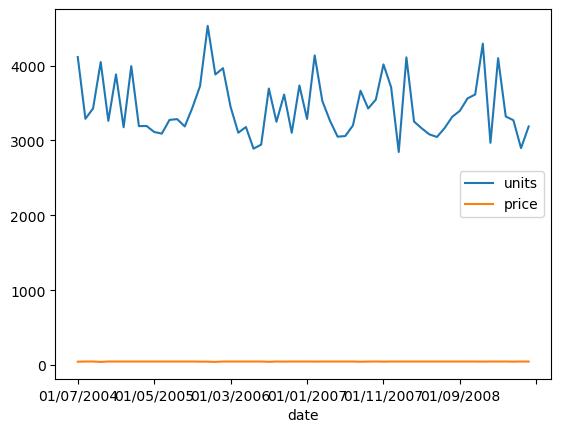

In [209]:
df=df.set_index("date")
df.plot()

In [200]:
split=round(len(df)*0.75)
train=df.iloc[:split,:]
validation=df.iloc[split:,:]
validation

,units,price
date,,
01/04/2008,3163,46.75
01/05/2008,3082,46.75
01/06/2008,3047,46.75
01/07/2008,3166,46.75
01/08/2008,3317,46.75
01/09/2008,3397,46.75
01/10/2008,3562,46.75
01/11/2008,3615,46.75
01/12/2008,4294,45.50


<AxesSubplot:xlabel='date'>

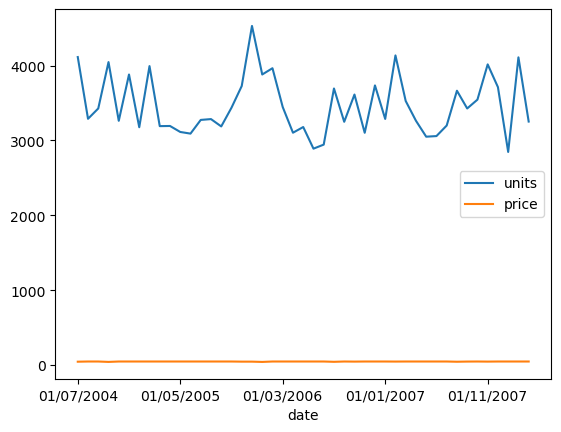

In [201]:
train.plot()

In [211]:
pmdarima.arima.nsdiffs(df['units'],m=4)

0

In [210]:
pmdarima.arima.nsdiffs(df['units'],m=12)

0

In [55]:
adfuller(train["units"])

(-3.594573628351183,
 0.005865619761714059,
 4,
 40,
 {'1%': -3.6055648906249997, '5%': -2.937069375, '10%': -2.606985625},
 484.7793491720372)

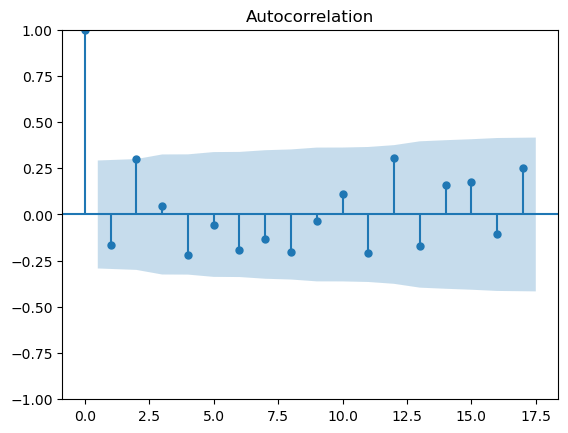

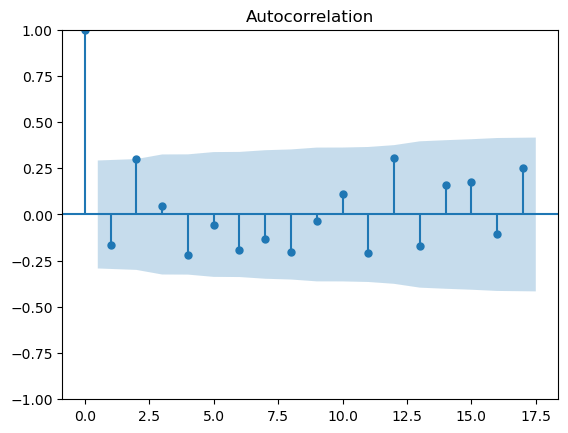

In [58]:
plot_acf(train["units"])

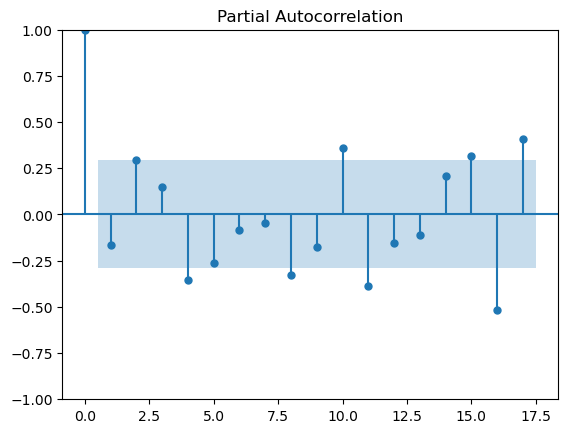

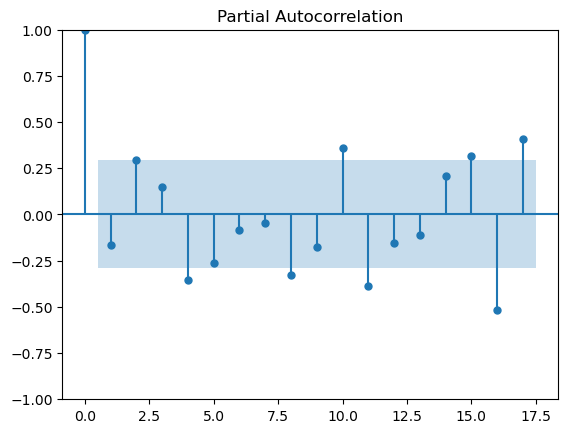

In [59]:
plot_pacf(train["units"])

In [187]:
sarima = sm.tsa.statespace.SARIMAX(train[["units"]],exog=train[["price"]],order=(0,0,0),seasonal_order=(1,1,0,12),trend='c').fit()
sarima.summary()

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                    units   No. Observations:                   45
Model:             SARIMAX(1, 1, 0, 12)   Log Likelihood                -205.665
Date:                  Sun, 12 Feb 2023   AIC                            419.330
Time:                          01:00:47   BIC                            425.316
Sample:                               0   HQIC                           421.344
                                   - 45                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -12.3551     26.337     -0.469      0.639     -63.974      39.264
price        -31.4266      1.961    -16.029      0.000     -35.269     -27.584
ar.S.L12      -0.4336      0.196     -2.218      0.027      -0.817      -0.050
sigma2      1.493e+04   4343.076      3.437      0.001    6415.447    2.34e+04
===================================================================================
Ljung-Box (L1) (Q):                   4.23   Jarque-Bera (JB):                 2.75
Prob(Q):                              0.04   Prob(JB):                         0.25
Heteroskedasticity (H):               1.82   Skew:                             0.70
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [188]:
pred_res = sarima.get_prediction()
pred_res.predicted_mean

date
01/07/2004   -5382.564574
01/08/2004   -5382.564574
01/09/2004   -4848.312567
01/10/2004   -5382.564574
01/11/2004   -5382.564574
01/12/2004   -5382.564574
01/01/2005   -5382.564574
01/02/2005   -5382.564574
01/03/2005   -5382.564574
01/04/2005   -5382.564574
01/05/2005   -5382.564574
01/06/2005   -5382.564574
01/07/2005    1778.807475
01/08/2005    1842.306438
01/09/2005    1732.917561
01/10/2005    1826.431697
01/11/2005    1949.460939
01/12/2005    3213.422698
01/01/2006    1765.909248
01/02/2006    2494.162982
01/03/2006    2044.709383
01/04/2006    1778.807475
01/05/2006    1707.371141
01/06/2006    1822.463012
01/07/2006    1788.602182
01/08/2006    1877.521675
01/09/2006    1861.426844
01/10/2006    1868.317900
01/11/2006    1888.109110
01/12/2006    2081.425548
01/01/2007    1782.398407
01/02/2007    2546.981421
01/03/2007    1972.782068
01/04/2007    1772.744322
01/05/2007    2535.958895
01/06/2007    1753.312885
01/07/2007    2262.712048
01/08/2007    1847.787083
01/09/2

In [195]:
pred_res = sarima.get_forecast(Y=validation[["units"]],exog=validation[["price"]],steps=15)
pred_res.predicted_mean

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


45    1924.735480
46    1816.155163
47    1689.095253
48    1729.023599
49    1812.990858
50    1793.483929
51    2427.878077
52    1839.427311
53    2054.209084
54    1740.943676
55    2314.019167
56    1943.644943
57    1983.179736
58    1851.828140
59    1691.876565
Name: predicted_mean, dtype: float64

In [169]:
validation

,units,price
date,,
01/04/2008,1808,171
01/05/2008,1856,171
01/06/2008,1832,171
01/07/2008,1760,171
01/08/2008,1932,171
01/09/2008,2008,171
01/10/2008,2552,154
01/11/2008,1960,171
01/12/2008,2244,171


In [141]:
auto_model = auto_arima(train[["units"]],X=train[["price"]])
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   45
Model:                        SARIMAX   Log Likelihood                -303.780
Date:                Sat, 11 Feb 2023   AIC                            613.560
Time:                        23:47:10   BIC                            618.980
Sample:                             0   HQIC                           615.580
                                 - 45                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7152.7077   1519.614      4.707      0.000    4174.318    1.01e+04
price        -30.5899      8.951     -3.418      0.001     -48.133     -13.047
sigma2      4.276e+04   9675.003      4.420      0.000    2.38e+04    6.17e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                27.34
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                             1.55
Prob(H) (two-sided):                  0.85   Kurtosis:                         5.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [142]:
forecasts, conf_int  = auto_model.predict(len(validation),X=validation[["price"]],return_conf_int=True,alpha=0.05)
forecasts

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


45    1921.833322
46    1921.833322
47    1921.833322
48    1921.833322
49    1921.833322
50    1921.833322
51    2441.861770
52    1921.833322
53    1921.833322
54    1921.833322
55    1921.833322
56    1921.833322
57    1921.833322
58    1921.833322
59    1921.833322
dtype: float64

In [104]:
forecasts, conf_int  = auto_model.predict(len(validation),X=validation[["price"]],return_conf_int=True,alpha=0.05)
conf_int_df=pd.DataFrame(conf_int)
conf_int_df.rename(columns = {0:'LFI',1:'UFI'}, inplace = True)
forecasts_df=pd.DataFrame(forecasts)
forecasts_df.rename(columns = {0:'Forecasts'}, inplace = True)
in_sample=auto_model.predict_in_sample()
in_sample=in_sample.reset_index(drop=True)
in_sample_df=pd.DataFrame(in_sample)
in_sample_df

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ValueError: When an ARIMA is fit with an X array, it must also be provided one for predicting or updating observations.

In [408]:
validation=validation.reset_index(drop=True)
validation
forecasts_df=forecasts_df.reset_index(drop=True)
validation
validation_forecasts_conf_int_df=pd.concat([validation,forecasts_df,conf_int_df],axis=1)
train=train.reset_index(drop=True)
train
in_sample_df
in_sample_train_df=pd.concat([in_sample_df,train],axis=1)
in_sample_train_df
final=pd.concat([in_sample_train_df,validation_forecasts_conf_int_df])
final=final.reset_index(drop=True)
final["Date"] = pd.date_range(start ='01/01/1984', freq ='QS', periods = 40)
final=final.set_index(final["Date"])
final=final.drop(['Date'], axis=1)
final


,predicted_mean,Sales,Forecasts,LFI,UFI
Date,,,,,
1984-01-01,3.295911,20,NaN,NaN,NaN
1984-04-01,3.295925,12,NaN,NaN,NaN
1984-07-01,3.295916,10,NaN,NaN,NaN
1984-10-01,3.295902,18,NaN,NaN,NaN
1985-01-01,23.295891,23,NaN,NaN,NaN
1985-04-01,15.174194,14,NaN,NaN,NaN
1985-07-01,12.694783,13,NaN,NaN,NaN
1985-10-01,21.415846,22,NaN,NaN,NaN
1986-01-01,26.763581,28,NaN,NaN,NaN


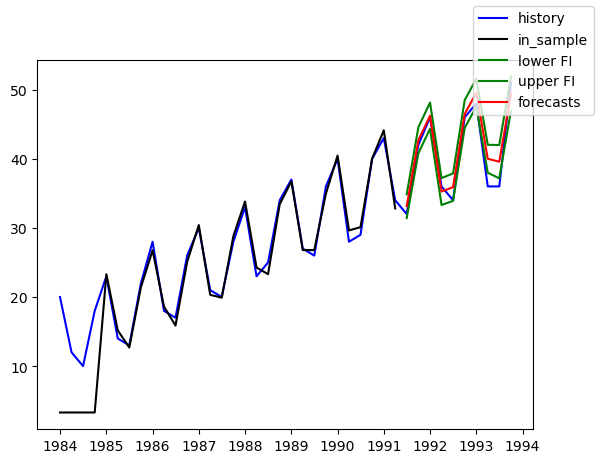

In [409]:
fig, ax = plt.subplots()
ax.plot(final["Sales"],color='blue',label='history')
ax.plot(final["predicted_mean"],color='black',label='in_sample')
ax.plot(final["LFI"],color='green',label='lower FI')
ax.plot(final["UFI"],color='green',label='upper FI')
ax.plot(final["Forecasts"],color='red',label='forecasts')
fig.legend()

In [410]:
import numpy as np
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
               # ACF1
    return({'mape':mape, 'mae': mae,  'rmse':rmse})

In [411]:
forecast_accuracy(final["Forecasts"],final["Sales"])

{'mape': 0.041830109344769564,
 'mae': 1.591551377784183,
 'rmse': 2.00078887034774}

In [412]:
sarimax = sm.tsa.statespace.SARIMAX(df,order=auto_model.order,seasonal_order=auto_model.seasonal_order).fit()
sarimax.summary()

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Sales   No. Observations:                   40
Model:             SARIMAX(2, 0, 0)x(1, 1, 0, 4)   Log Likelihood                 -65.613
Date:                           Mon, 06 Feb 2023   AIC                            139.226
Time:                                   16:40:55   BIC                            145.560
Sample:                                        0   HQIC                           141.437
                                            - 40                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8288      0.216      3.829      0.000       0.405       1.253
ar.L2          0.1350      0.211      0.641      0.522      -0.278       0.548
ar.S.L4       -0.4172      0.217     -1.923      0.054      -0.842       0.008
sigma2         2.0811      0.563      3.697      0.000       0.978       3.184
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 1.10
Prob(Q):                              0.68   Prob(JB):                         0.58
Heteroskedasticity (H):               3.84   Skew:                             0.42
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [413]:
pred = sarimax.get_forecast(steps = 8)
forecasts=pred.predicted_mean
ci=pred.conf_int()
forecasts_df=pd.DataFrame(forecasts)
ci_df=pd.DataFrame(ci)
predictions_df=pd.concat([forecasts_df,ci_df],axis=1)

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [414]:
predictions_df

,predicted_mean,lower Sales,upper Sales
40,53.075364,50.247921,55.902807
41,41.798502,38.126216,45.470787
42,40.769395,36.423540,45.115249
43,54.341403,49.451074,59.231732
44,56.212834,50.007228,62.418440
45,44.467500,37.358107,51.576893
46,43.706215,35.829539,51.582891
47,57.717591,49.185722,66.249461


In [415]:
final=pd.concat([df,predictions_df],axis=1)
final=final.reset_index(drop=True)
final["Date"] = pd.date_range(start ='01/01/1984', freq ='QS', periods = 48)
final=final.set_index(final["Date"])
final=final.drop(['Date'], axis=1)

In [416]:
final

,Sales,predicted_mean,lower Sales,upper Sales
Date,,,,
1984-01-01,20.0,NaN,NaN,NaN
1984-04-01,12.0,NaN,NaN,NaN
1984-07-01,10.0,NaN,NaN,NaN
1984-10-01,18.0,NaN,NaN,NaN
1985-01-01,23.0,NaN,NaN,NaN
1985-04-01,14.0,NaN,NaN,NaN
1985-07-01,13.0,NaN,NaN,NaN
1985-10-01,22.0,NaN,NaN,NaN
1986-01-01,28.0,NaN,NaN,NaN


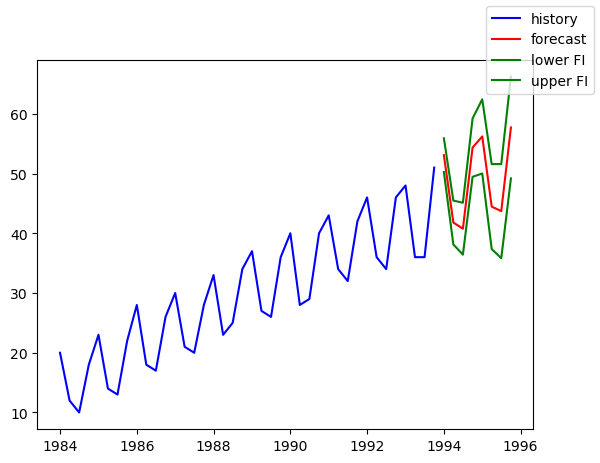

In [417]:
fig, ax = plt.subplots()
ax.plot(final["Sales"],color='blue',label='history')
ax.plot(final["predicted_mean"],color='red',label='forecast')
ax.plot(final["lower Sales"],color='green',label='lower FI')
ax.plot(final["upper Sales"],color='green',label='upper FI')
fig.legend()